In [1]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. train.csv : 학습 데이터
    id : 샘플 아이디
    Age : 나이
    TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
    CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
    DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
    Occupation : 직업
    Gender : 성별
    NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
    NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
    ProductPitched : 영업 사원이 제시한 상품
    PreferredPropertyStar : 선호 호텔 숙박업소 등급
    MaritalStatus : 결혼여부
    NumberOfTrips : 평균 연간 여행 횟수
    Passport : 여권 보유 여부 (0: 없음, 1: 있음)
    PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
    OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
    NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
    Designation : (직업의) 직급
    MonthlyIncome : 월 급여
    ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)

## 2. test.csv : 테스트 데이터

    id : 샘플 아이디
    Age : 나이
    TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
    CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
    DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
    Occupation : 직업
    Gender : 성별
    NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
    NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
    ProductPitched : 영업 사원이 제시한 상품
    PreferredPropertyStar : 선호 호텔 숙박업소 등급
    MaritalStatus : 결혼여부
    NumberOfTrips : 평균 연간 여행 횟수
    Passport : 여권 보유 여부 (0: 없음, 1: 있음)
    PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
    OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
    NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
    Designation : (직업의) 직급
    MonthlyIncome : 월 급여

## 3. sample_submission.csv : 제출 양식
    id : 샘플 아이디
    ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)

# I. 데이터 살펴보기

## 1. 데이터 준비

In [2]:
# 데이터를 불러오고 살펴보기 위한 pandas 라이브러리
import pandas as pd

# train 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/DACON/여행상품신청여부예측/data/train.csv')

# test 데이터 불러오기
test = pd.read_csv('/content/drive/MyDrive/DACON/여행상품신청여부예측/data/test.csv')

# sample_submission 불러오기
sample_submission = pd.read_csv('/content/drive/MyDrive/DACON/여행상품신청여부예측/data/sample_submission.csv')

In [3]:
# 잘 불러와졌는지 확인합니다.
train

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


## 2. 데이터 확인

In [4]:
# 데이터를 살펴보기 위해 데이터 최상단의 5줄을 표시합니다.
train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


In [5]:
# 데이터를 살펴보기 위해 데이터 최하단의 5줄을 표시합니다.
train.tail()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0
1954,1955,22.0,Company Invited,1,9.0,Salaried,Male,2,4.0,Basic,3.0,Divorced,1.0,1,3,0,0.0,Executive,17853.0,1


In [6]:
# 데이터 결측치 및 변수들의 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [7]:
print(train.isnull().sum())

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64


* 결측치가 있는 컬럼 : Age, TypeofContact, DurationOfPitch, NumberOfPersonVisiting, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome  
* TypeofContact, Occupation 등 숫자가 아닌 카테고리형 데이터도 여럿 보여 분석 전에 데이터 전처리가 필요

## 3. 데이터 시각화

### 상관관계 표

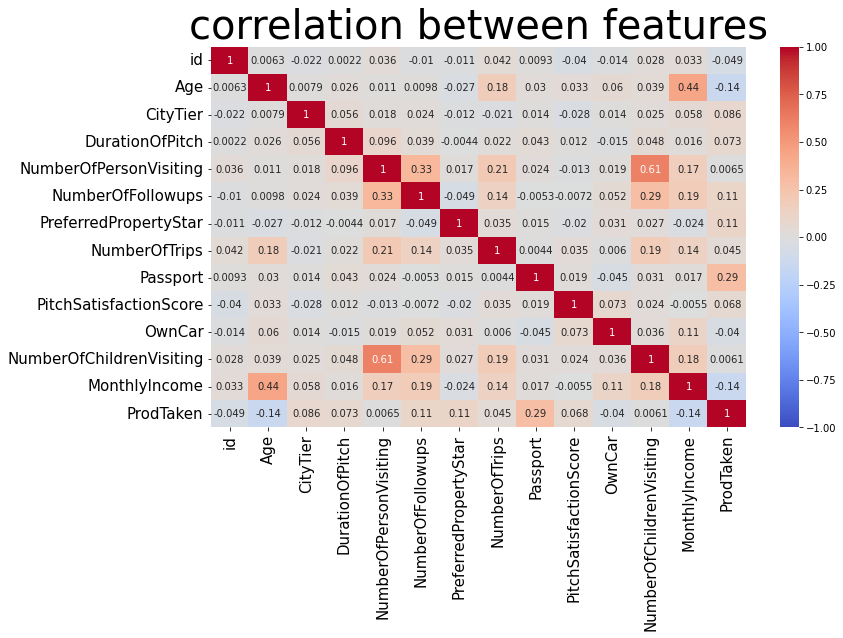

In [114]:



#상관관계 분석도
plt.figure(figsize=(12,7))
heat_table = train.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = False
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm', vmin=-1, vmax=1)
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=90)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

### 수치형 데이터 탐색
[참고 코드](https://dacon.io/competitions/official/235959/codeshare/6041?page=1&dtype=recent)

In [116]:
# 수치형 데이터 컬럼 확인
print(train.select_dtypes(exclude=['object']).columns)

Index(['id', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome', 'ProdTaken'],
      dtype='object')


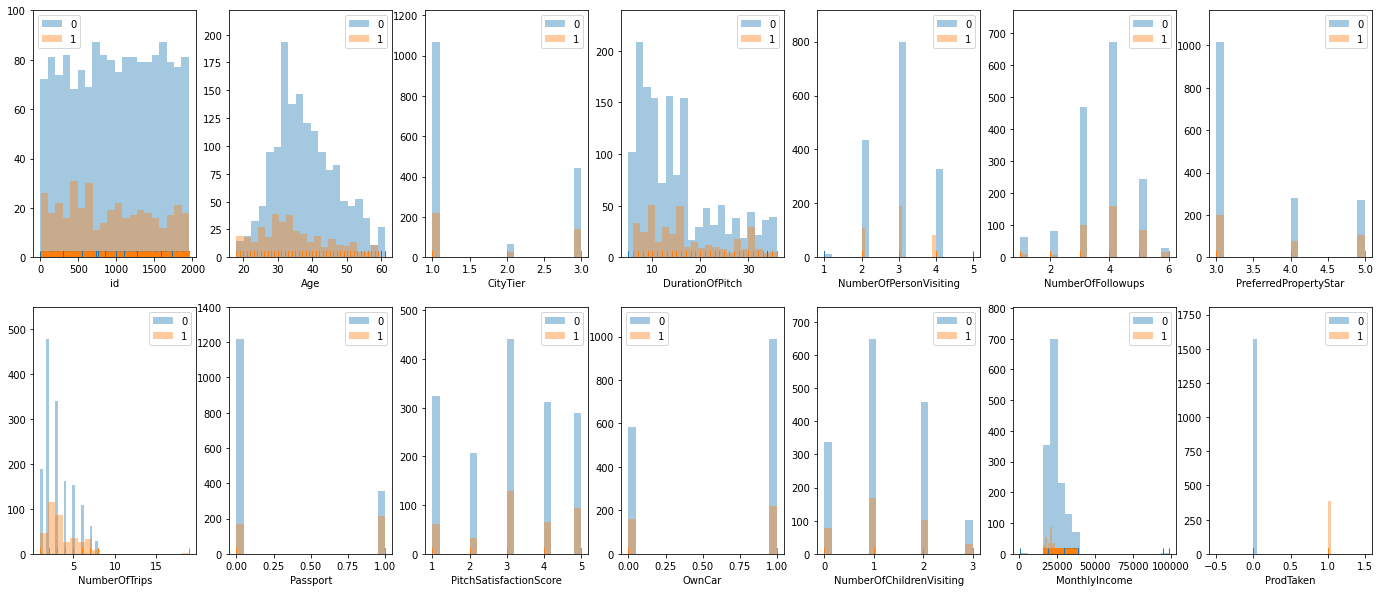

In [118]:
cols = train.select_dtypes(exclude=['object']).columns
fig, axes = plt.subplots(2, 7,  figsize=(24,10))
for i, col in enumerate(cols):
    if i <=6:
        k = i
        j  = 0
    else:
        j = 1
        k = i-7
    g = sns.distplot(train[train['ProdTaken']==0][col], hist=True, kde=False, rug=True, bins=20, label="0", ax = axes[j][k])
    h = sns.distplot(train[train['ProdTaken']==1][col], hist=True, kde=False, rug=True, bins=20, label="1", ax = axes[j][k])
    axes[j][k].legend()
    plt.xlabel(col)
plt.show()
plt.close()

### 범주형 데이터 탐색
[참고 코드](https://dacon.io/competitions/official/235959/codeshare/6041?page=1&dtype=recent)

In [119]:
# 범주형 데이터 컬럼 확인
print(train.select_dtypes(include=['object']).columns)

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')


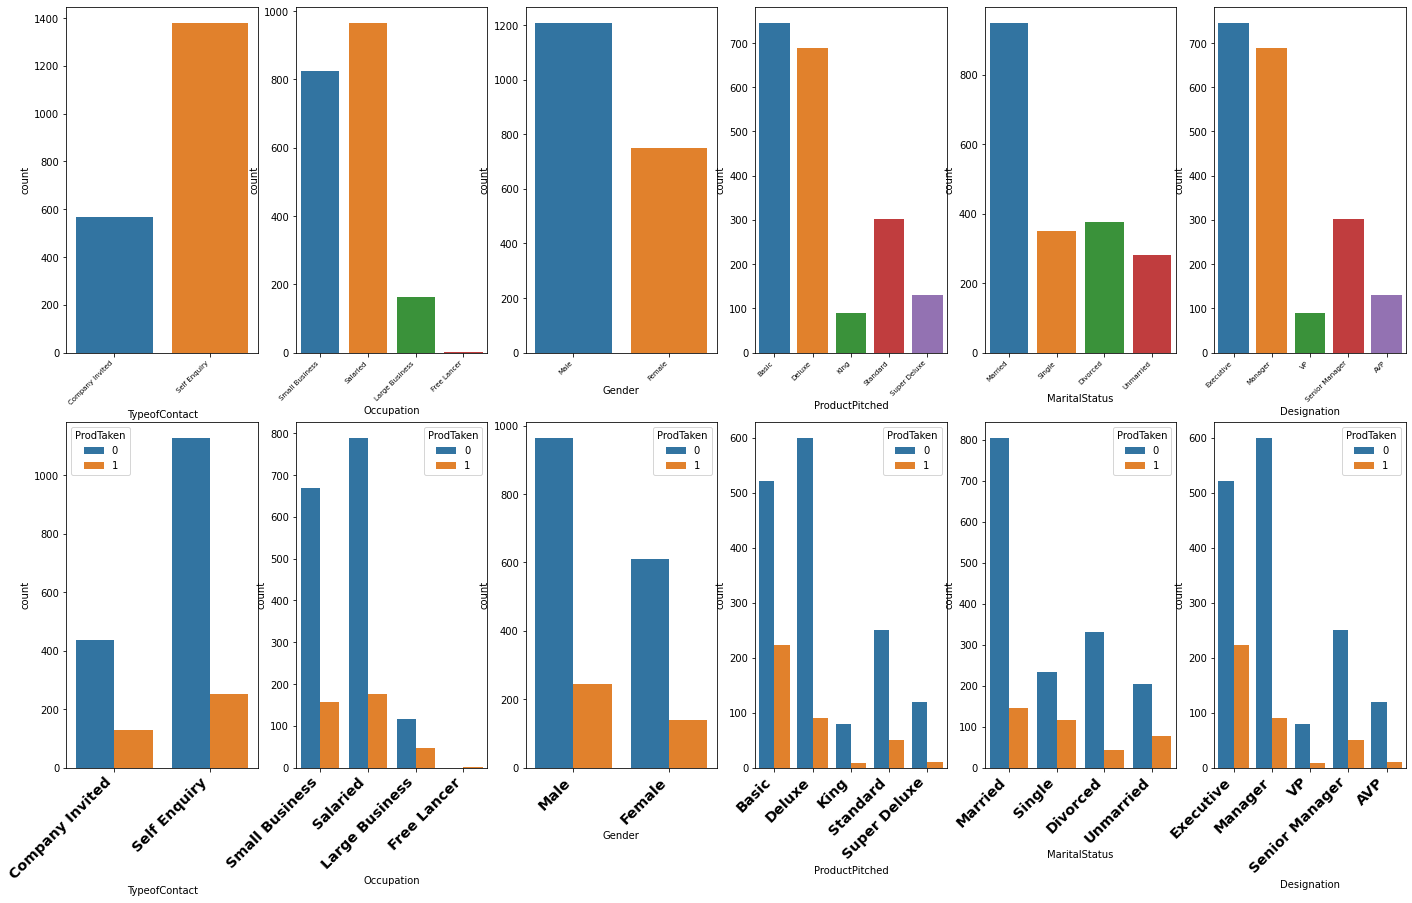

In [120]:
fig, axes = plt.subplots(2, 6,  figsize=(24,14))
for i, col in enumerate(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']):
    g = sns.countplot(train[col] , ax = axes[0][i])
    # axes[i].legend()
    g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
    plt.xlabel(col)
for i, col in enumerate(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']):
    g = sns.countplot(train[col],  hue = train['ProdTaken'].map({0:'0', 1:'1'}) , ax = axes[1][i])
    # axes[i].legend()
    g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='heavy',
                  fontsize='x-large'
                 )
    plt.xlabel(col)


plt.show()
plt.close()


### ProdTaken

In [8]:
train['ProdTaken'].value_counts()

0    1572
1     383
Name: ProdTaken, dtype: int64

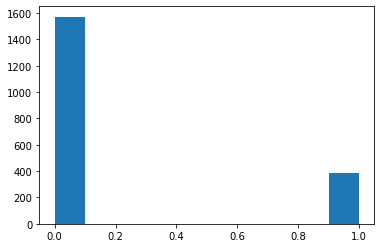

In [9]:
import matplotlib.pyplot as plt

# 이번엔 예측하고자 하는 값인 ProdTaken를 확인해봅니다.
plt.hist(train.ProdTaken)
plt.show()

In [18]:
import numpy as np
import seaborn as sns

Text(0, 0.5, '')

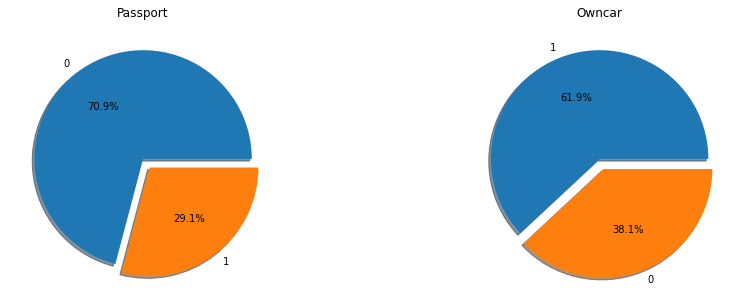

In [108]:
f, ax = plt.subplots(1, 2, figsize=(15,5))
train['Passport'].value_counts().plot.pie(explode=[0,0.1],
                                           autopct='%1.1f%%', 
                                           ax=ax[0], 
                                           shadow=True)
ax[0].set_title('Passport')
ax[0].set_ylabel('')

train['OwnCar'].value_counts().plot.pie(explode=[0,0.1],
                                           autopct='%1.1f%%', 
                                           ax=ax[1], 
                                           shadow=True)
ax[1].set_title('Owncar')
ax[1].set_ylabel('')


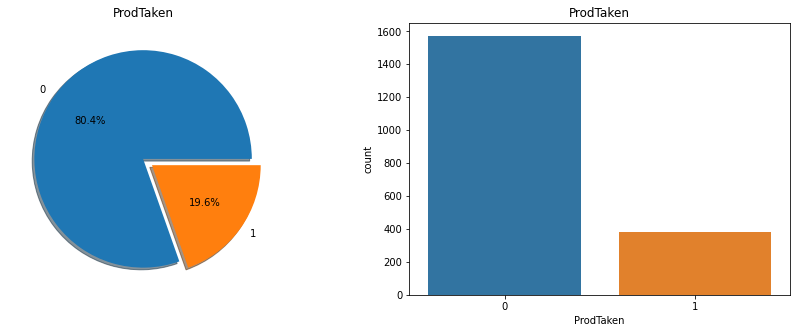

In [19]:
f, ax=plt.subplots(1, 2, figsize=(15,5))
train['ProdTaken'].value_counts().plot.pie(explode=[0,0.1], 
                                           autopct='%1.1f%%', 
                                           ax=ax[0], 
                                           shadow=True)
ax[0].set_title('ProdTaken')
ax[0].set_ylabel('')
sns.countplot('ProdTaken',data=train,ax=ax[1])
ax[1].set_title('ProdTaken')
plt.show()

### Age

In [12]:
# train.groupby('Designation')['Age'].mean()

In [13]:
train['Age'].describe()

count    1861.000000
mean       37.462117
std         9.189948
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        61.000000
Name: Age, dtype: float64

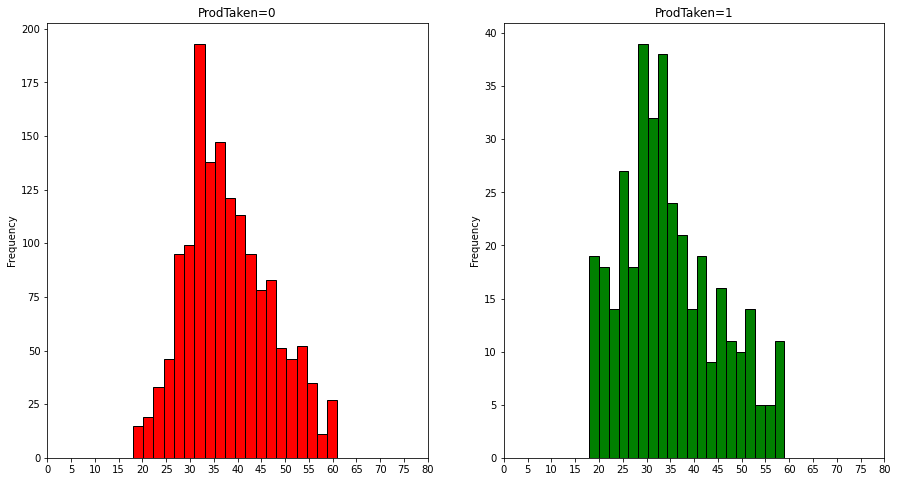

In [20]:
f, ax = plt.subplots(1, 2, figsize=(15,8))

train[train['ProdTaken']==0].Age.plot.hist(ax=ax[0], 
                                           bins=20, 
                                           edgecolor='black', 
                                           color='red')

ax[0].set_title('ProdTaken=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

train[train['ProdTaken']==1].Age.plot.hist(ax=ax[1], 
                                           color='green', 
                                           bins=20, 
                                           edgecolor='black')

ax[1].set_title('ProdTaken=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

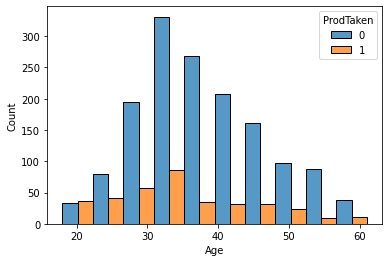

In [23]:
sns.histplot(train, x='Age', bins=10, hue='ProdTaken', multiple="dodge")

* 데이터에 30대의 비율이 높음

### TypeofContact

In [15]:
train['TypeofContact'].unique()

array(['Company Invited', 'Self Enquiry', nan], dtype=object)

<function matplotlib.pyplot.show(*args, **kw)>

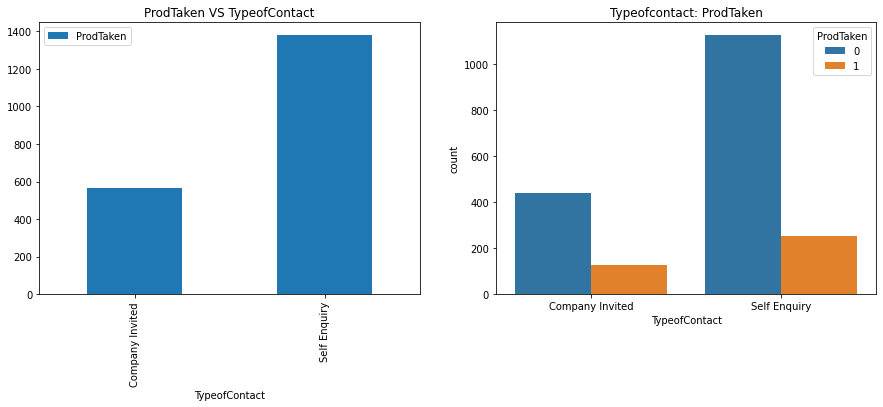

In [16]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
train[['TypeofContact','ProdTaken']].groupby(['TypeofContact']).count().plot.bar(ax=ax[0])
ax[0].set_title('ProdTaken VS TypeofContact')
sns.countplot('TypeofContact', 
              hue='ProdTaken', 
              data=train, 
              ax=ax[1])
ax[1].set_title('Typeofcontact: ProdTaken')
plt.show

* 회사의 홍보보다는 직접 검색해서 고객이 된 경우가 많음
* 여행 상품 신청으로 이어지는 비율은 회사 홍보로 이루어지는 경우가 큼

### CityTier

<function matplotlib.pyplot.show(*args, **kw)>

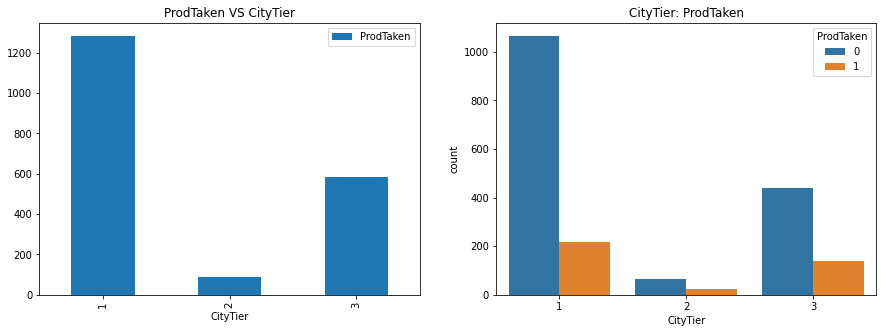

In [17]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
train[['CityTier','ProdTaken']].groupby(['CityTier']).count().plot.bar(ax=ax[0])
ax[0].set_title('ProdTaken VS CityTier')
sns.countplot('CityTier', 
              hue='ProdTaken', 
              data=train, 
              ax=ax[1])
ax[1].set_title('CityTier: ProdTaken')
plt.show

### DurationOfPitch VS NumberOfFollowups VS PitchSatisfactionScore

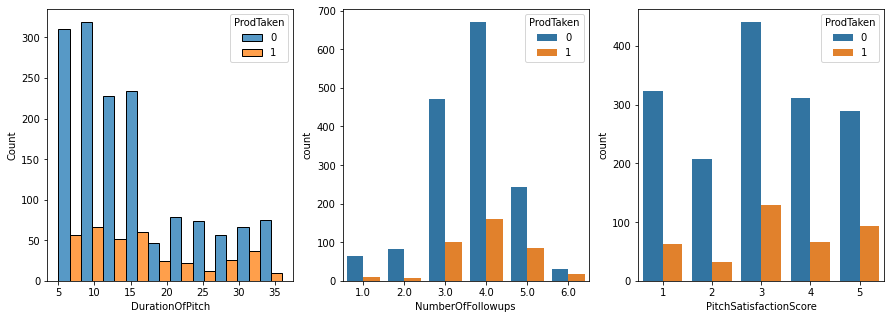

In [44]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(train, x='DurationOfPitch', bins=10, hue='ProdTaken', multiple="dodge", ax=ax[0])
sns.countplot('NumberOfFollowups', 
              hue='ProdTaken', 
              data=train, 
              ax=ax[1])
sns.countplot('PitchSatisfactionScore', 
              hue='ProdTaken', 
              data=train, 
              ax=ax[2])

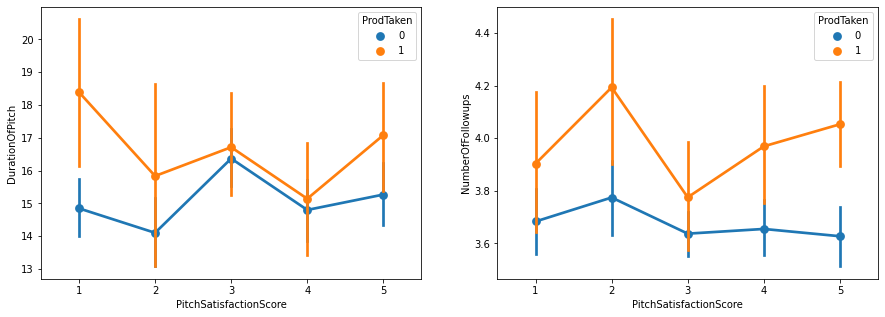

In [40]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.pointplot(x='PitchSatisfactionScore', y='DurationOfPitch', data=train, hue='ProdTaken', ax=ax[0])
sns.pointplot(x='PitchSatisfactionScore', y='NumberOfFollowups', data=train, hue='ProdTaken', ax=ax[1])


* 영업사원의 프레젠테이션 기간이 짧았을 때 신청비율이 높다.
* 영업사원의 후속조치가 4.0일 때 신청 수가 많다.
* 영업사원의 프레젠테이션 점수가 3.0일 때 신청 수가 많다.
* 영업사원의 프레젠테이션 기간가 후속조치가 영업사원 만족도 점수에 큰 영향을 미치지 않는다.

### Occupation

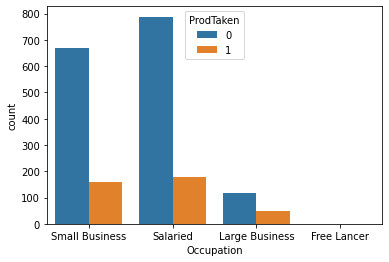

In [45]:
sns.countplot('Occupation', 
              hue='ProdTaken', 
              data=train)

### Gender

In [48]:
train['Gender'].unique()

array(['Male', 'Female', 'Fe Male'], dtype=object)

In [51]:
# 잘못입력된 정보 수정 (Fe Male -> Female)
train['Gender'].replace('Fe Male', 'Female', inplace=True)

In [52]:
# 변경되었는지 확인
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [57]:
# test set도 확인
test['Gender'].unique()

array(['Male', 'Female', 'Fe Male'], dtype=object)

In [58]:
# 잘못입력된 정보 수정 (Fe Male -> Female)
test['Gender'].replace('Fe Male', 'Female', inplace=True)
test['Gender'].unique()

array(['Male', 'Female'], dtype=object)

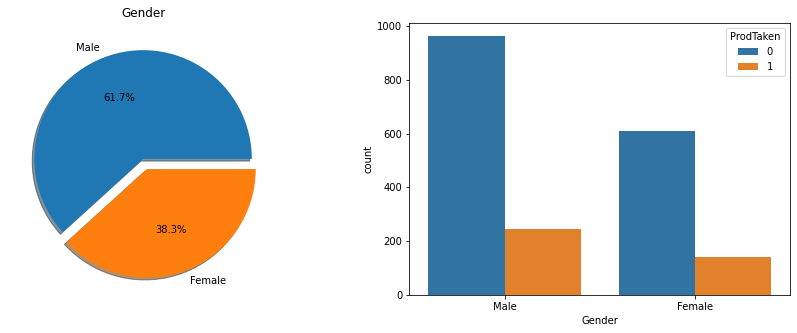

In [54]:
f, ax = plt.subplots(1, 2, figsize=(15,5))
train['Gender'].value_counts().plot.pie(explode=[0,0.1],
                                           autopct='%1.1f%%', 
                                           ax=ax[0], 
                                           shadow=True)
ax[0].set_title('Gender')
ax[0].set_ylabel('')

sns.countplot('Gender', 
              hue='ProdTaken', 
              data=train,
              ax=ax[1])

plt.show()

### NumberOfPersonVisiting VS MaritalStatus VS NumberOfChildrenVisiting

In [55]:
train['NumberOfPersonVisiting'].unique()

array([3, 2, 4, 1, 5])

In [60]:
train['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced', 'Unmarried'], dtype=object)

In [62]:
train['NumberOfChildrenVisiting'].unique()

array([ 1.,  0.,  2.,  3., nan])

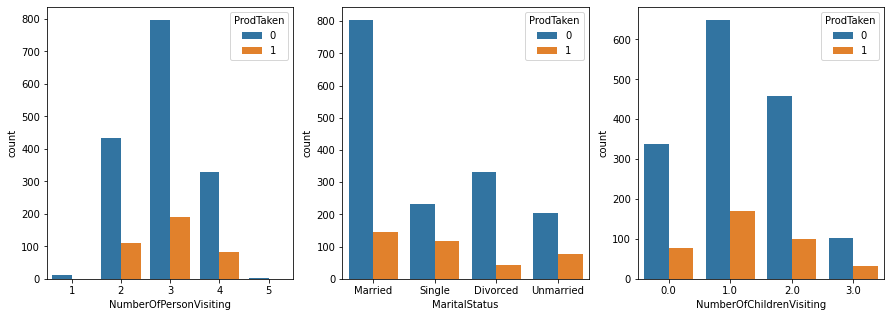

In [64]:
f, ax = plt.subplots(1, 3, figsize=(15,5))
sns.countplot('NumberOfPersonVisiting', 
              hue='ProdTaken', 
              data=train, 
              ax=ax[0])
sns.countplot('MaritalStatus', 
              hue='ProdTaken', 
              data=train, 
              ax=ax[1])
sns.countplot('NumberOfChildrenVisiting', 
              hue='ProdTaken', 
              data=train, 
              ax=ax[2])

*  **1명의 어린이 여행객 + 1명 또는 2명의 어린이가 아닌 여행객** 의 경우가 제일 많을 것

### ProductPitched VS MonthlyIncome

In [65]:
train['ProductPitched'].unique()

array(['Basic', 'Deluxe', 'King', 'Standard', 'Super Deluxe'],
      dtype=object)

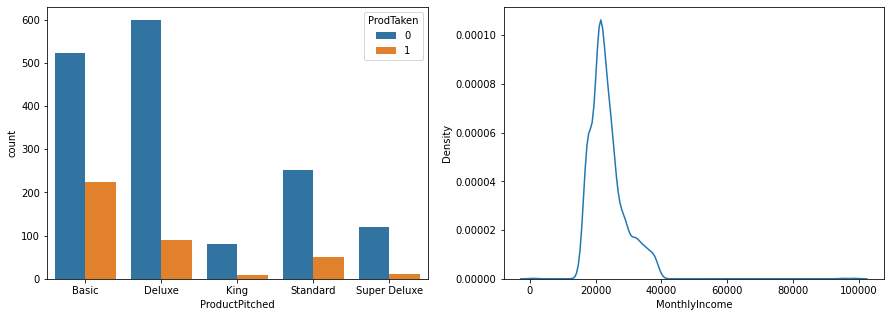

In [69]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('ProductPitched', 
              hue='ProdTaken', 
              data=train,
              ax=ax[0])
sns.kdeplot(data=train, x='MonthlyIncome', ax=ax[1])

In [95]:
ProductByIncome = train.groupby(train['ProductPitched'], as_index=False).mean()
ProductByIncome = ProductByIncome[['ProductPitched', 'MonthlyIncome']]
ProductByIncome

,ProductPitched,MonthlyIncome
0,Basic,20110.209859
1,Deluxe,22614.373397
2,King,35796.179775
3,Standard,26715.056291
4,Super Deluxe,32148.438462


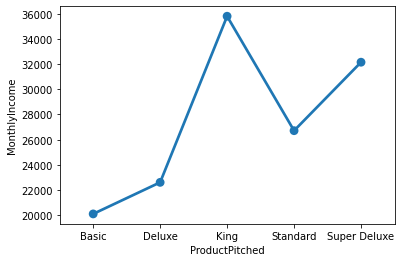

In [106]:
sns.pointplot(x="ProductPitched", y='MonthlyIncome', data=ProductByIncome)

### NumberOfTrips VS Designation

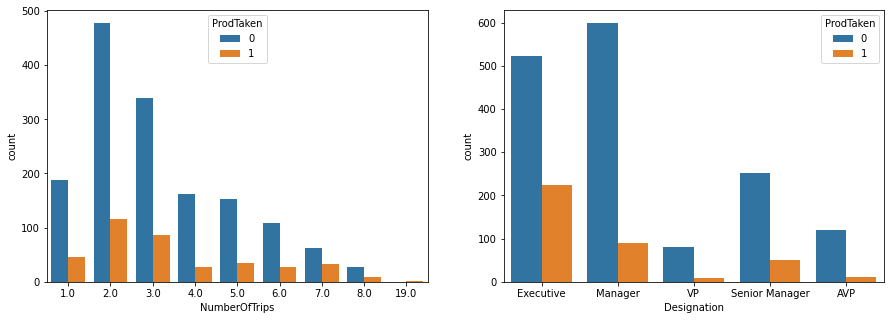

In [97]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot('NumberOfTrips', 
              hue='ProdTaken', 
              data=train, 
              ax=ax[0])

sns.countplot('Designation', 
              hue='ProdTaken', 
              data=train, 
              ax=ax[1])

In [103]:
NumberOfTripsByDes = train.groupby(train['Designation'], as_index=False).mean()
NumberOfTripsByDes = NumberOfTripsByDes[['Designation', 'NumberOfTrips']]
NumberOfTripsByDes

,Designation,NumberOfTrips
0,AVP,3.620370
1,Executive,3.144011
2,Manager,3.246734
3,Senior Manager,3.392027
4,VP,3.403509


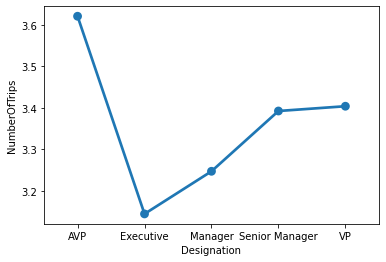

In [107]:
sns.pointplot(x="Designation", y='NumberOfTrips', data=NumberOfTripsByDes)

* 여행횟수는 2~3번 경험이 많다
* VP = 부사장 직급
* 직급이 높을수록 평균 여행횟수가 많다

### Passport, OwnCar

# II. 데이터 전처리

## 1. 결측치(NA) 처리

* 간단하게 숫자 0 과 문자 "Unknown"으로 빈 부분을 채워주겠습니다.  
칼럼이 숫자형 변수인 경우에는 0으로, 문자형인 경우에는 "Unknown"을 사용합니다.


In [18]:
# 결측치를 처리하는 함수를 작성합니다.
def handle_na(data):
    temp = data.copy()
    for col, dtype in temp.dtypes.items():
        if dtype == 'object':
            # 문자형 칼럼의 경우 'Unknown'을 채워줍니다.
            value = 'Unknown'
        elif dtype == int or dtype == float:
            # 수치형 칼럼의 경우 0을 채워줍니다.
            value = 0
        temp.loc[:,col] = temp[col].fillna(value)
    return temp

train_nona = handle_na(train)

# 결측치 처리가 잘 되었는지 확인해 줍니다.
train_nona.isna().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

## 2. 문자형 변수 전처리

In [19]:
# object 컬럼 추출
object_columns = train_nona.columns[train_nona.dtypes == 'object']
print('object 칼럼은 다음과 같습니다 : ', list(object_columns))

# 해당 칼럼만 보아서 봅시다
train_nona[object_columns]

object 칼럼은 다음과 같습니다 :  ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Company Invited,Small Business,Male,Basic,Married,Executive
1,Self Enquiry,Small Business,Female,Deluxe,Single,Manager
2,Company Invited,Salaried,Male,Deluxe,Married,Manager
3,Company Invited,Small Business,Male,Basic,Married,Executive
4,Self Enquiry,Salaried,Male,Deluxe,Divorced,Manager
...,...,...,...,...,...,...
1950,Self Enquiry,Small Business,Male,Basic,Single,Executive
1951,Self Enquiry,Salaried,Female,Super Deluxe,Divorced,AVP
1952,Company Invited,Small Business,Female,Basic,Divorced,Executive
1953,Self Enquiry,Small Business,Female,Deluxe,Married,Manager


In [20]:
# LabelEncoder를 준비해줍니다.
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# LabelEcoder는 학습하는 과정을 필요로 합니다.
encoder.fit(train_nona['TypeofContact'])

#학습된 encoder를 사용하여 문자형 변수를 숫자로 변환해줍니다.
encoder.transform(train_nona['TypeofContact'])

array([0, 1, 0, ..., 0, 1, 0])

In [21]:
train_enc = train_nona.copy()

# 모든 문자형 변수에 대해 encoder를 적용합니다.
for o_col in object_columns:
    encoder = LabelEncoder()
    encoder.fit(train_enc[o_col])
    train_enc[o_col] = encoder.transform(train_enc[o_col])

# 결과를 확인합니다.
train_enc

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,0,1,10.0,3,2,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0,0
1,2,34.0,1,3,0.0,3,1,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0,1
2,3,45.0,0,1,0.0,2,2,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,0.0,0
3,4,29.0,0,1,7.0,3,2,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0,1
4,5,42.0,1,3,6.0,2,2,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,2,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0,0
1951,1952,41.0,1,3,8.0,2,1,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0,0
1952,1953,38.0,0,3,28.0,3,1,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0,0
1953,1954,28.0,1,3,30.0,3,1,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.0,0


In [22]:
# 결측치 처리
test = handle_na(test)

# 문자형 변수 전처리
for o_col in object_columns:
    encoder = LabelEncoder()
    
    # test 데이터를 이용해 encoder를 학습하는 것은 Data Leakage 입니다! 조심!
    encoder.fit(train_nona[o_col])
    
    # test 데이터는 오로지 transform 에서만 사용되어야 합니다.
    test[o_col] = encoder.transform(test[o_col])

# 결과를 확인합니다.
test

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,0,3,0.0,3,2,2,5.0,1,3.0,1,1.0,0,2,0,1.0,2,19668.0
1,2,46.0,1,2,11.0,3,2,3,0.0,1,4.0,1,1.0,1,5,0,1.0,2,20021.0
2,3,37.0,1,3,22.0,3,2,3,4.0,1,3.0,1,5.0,0,5,1,0.0,2,21334.0
3,4,43.0,1,1,36.0,3,2,3,6.0,1,3.0,3,6.0,0,3,1,2.0,2,22950.0
4,5,25.0,1,3,7.0,1,1,4,4.0,0,4.0,3,3.0,1,4,1,3.0,1,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,1,1,6.0,3,1,2,3.0,4,3.0,2,7.0,0,4,1,1.0,0,32328.0
2929,2930,33.0,1,1,9.0,3,0,4,2.0,1,3.0,3,2.0,0,3,0,1.0,2,23733.0
2930,2931,33.0,0,1,31.0,2,2,4,4.0,1,3.0,0,3.0,0,4,1,1.0,2,23987.0
2931,2932,26.0,1,1,9.0,3,2,4,2.0,0,5.0,3,2.0,0,2,1,3.0,1,22102.0


# III. Modeling

## 1. 모델 선택

이번 프로젝트에서 사용할 모델은 로지스틱 회귀(Logistic Regression) 모델입니다.  

로지스틱 회귀 모델은 분류 문제를 해결할 수 있도록 선형 회귀 모델에 로지스틱 함수를 추가한 모델입니다.  

***선형 회귀란?***  
선형 회귀란 예측하고자 하는 종속 변수 y와 독립 변수 x의 관계를 가장 잘 나타내는 선(Line)을 구하는 회귀분석 방법입니다.
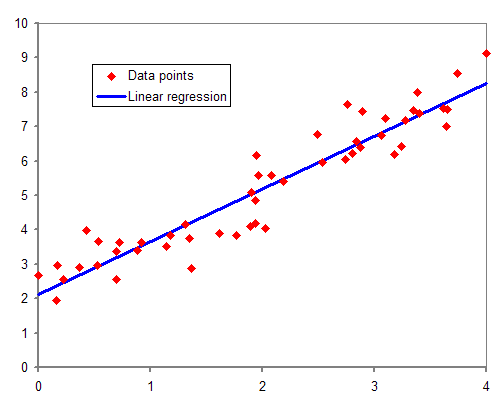<br>
위 그래프에서 파란색 선 (Linear regression)은 빨간색 점 (Data points)들이 보여주는 x와 y의 관계를 잘 나타내고 있습니다.

우리는 이처럼 선형 회귀 분석을 통해 x 값이 증가할수록 y 값도 증가한다는 상관 관계를 확인할 수 있으며, 새로운 x 값이 등장했을 때에도 그 x 값에 해당하는 y 값이 어디 쯤에 위치할 지 어느정도 예측할 수 있게 됩니다.

회귀 선을 구하기 위해서는 Normal Equation, Gradient Descent 등의 방법이 있지만 이는 이번에 다루기엔 너무 어려운 내용이기 때문에 다루지 않겠습니다.

이번 과정에서는 sklearn 패키지를 이용해 간단하게 로지스틱 회귀를 사용해보도록 하겠습니다.

In [23]:
from sklearn.linear_model import LogisticRegression

# 모델 선언
model = LogisticRegression()

## 2. 학습/예측

In [24]:
# 분석할 의미가 없는 칼럼을 제거합니다.
train = train_enc.drop(columns=['id'])
test = test.drop(columns=['id'])

# 학습에 사용할 정보와 예측하고자 하는 정보를 분리합니다.
x_train = train.drop(columns=['ProdTaken'])
y_train = train[['ProdTaken']]

In [25]:
# 모델 학습
model.fit(x_train,y_train)

LogisticRegression()

In [26]:
# 학습된 모델을 이용해 결과값 예측후 상위 10개의 값 확인
prediction = model.predict(test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(prediction[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[0 0 0 0 1 0 0 0 0 0]


# IV. 데이콘 제출하기

## 1. submission 파일 생성

In [27]:
# 예측된 값을 정답파일과 병합
sample_submission['ProdTaken'] = prediction

# 정답파일 데이터프레임 확인
sample_submission.head()

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1


In [28]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
sample_submission.to_csv('submission(Logistic01).csv',index = False)